<a href="https://colab.research.google.com/github/Umer1farooq/AI-Project/blob/main/NoteBooks/Phase_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Imports done. TensorFlow version: 2.19.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/datasets/diabetic_retinopathy_2019/splitted
└── train
└── val
└── test
 └── Mild
 └── Moderate
 └── No_DR
 └── Proliferate_DR
 └── Severe
   - a2696f444ecb.png
   - e9ff9352ccb3.png
   - 82ac8463fadd.png
   - 89d9c071a56f.png
   - b7278b4f2448.png
   - 032d7b0b4bf6.png
   - 78d53c82a23e.png
   - 00e4ddff966a.png
   - 29580bed2f7d.png
   - 041f09eec1e8.png
   - b09101adb478.png
   - cb68fce07789.png
   - f298b7d05958.png
   - a9e3d186cd1b.png
   - fe06dad6851c.png
   - 0bf37ca3156a.png
   - 61bbc11fe503.png
   - 8fd7ad26e691.png
   - 95e732e043a1.png
   - 857230f64a2e.png
   - 8c0d05233238.png
   - c3a82acb7d7a.png
   - 7e160c8b611e.png
   - e0b5a982a018.png
   - a9e984b57556.png
 └── Mild
 └── Moderate
 └── No_DR
 └── Proliferate_DR
 └── Severe
   - c739ff9580d3.png
   - f5650eb52640.png
   - 3ee

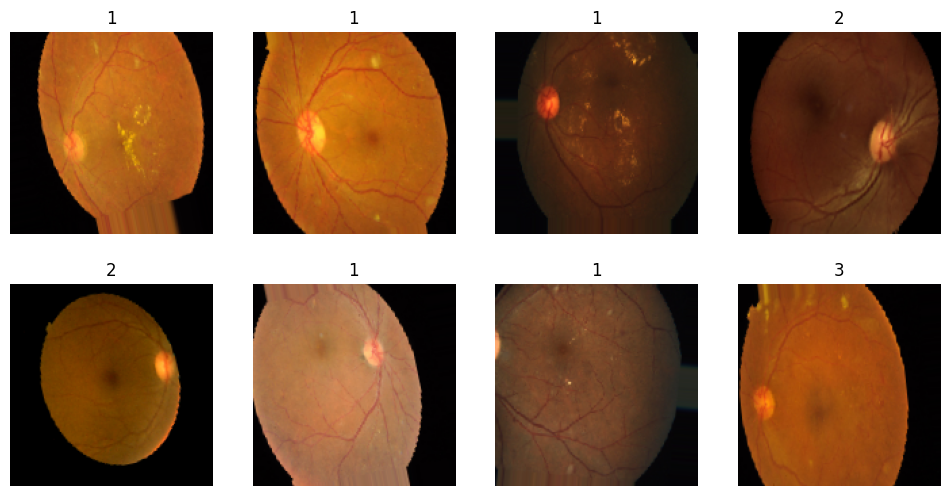

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,403,333 (20.61 MB)

 Trainable params: 5,402,885 (20.61 MB)

 Non-trainable params: 448 (1.75 KB)

Model compiled.
Callbacks ready.


In [ ]:
# 1️⃣ Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

print("Imports done. TensorFlow version:", tf.__version__)

# 2️⃣ Mount Google Drive & set paths
from google.colab import drive
drive.mount('/content/drive')

# Update paths to your dataset
base_dir = "/content/drive/MyDrive/datasets/diabetic_retinopathy_2019/splitted"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Image params
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

# 3️⃣ Verify dataset structure
def print_tree(path, level=1):
    if not os.path.exists(path):
        print("MISSING:", path)
        return
    print(path)
    for root, dirs, files in os.walk(path):
        depth = root.replace(path, "").count(os.sep)
        if depth > level: continue
        indent = " " * depth
        for d in dirs: print(f"{indent}└── {d}")
        for f in files[:5]: print(f"{indent} - {f}")
    print("-"*40)

print_tree(base_dir, level=2)

# 4️⃣ Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 5️⃣ Create flow_from_directory generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# 6️⃣ Visualize some samples
images, labels = next(train_generator)
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(np.argmax(labels[i]))
    plt.axis('off')
plt.show()

# 7️⃣ Build Medium CNN
def build_medium_cnn(input_shape=(150,150,3), num_classes=5):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_medium_cnn(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
model.summary()

# 8️⃣ Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
print("Model compiled.")

# 9️⃣ Callbacks
checkpoint_path = "/content/drive/MyDrive/chest_xray_models/best_medium_cnn_dr.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-7)
]
print("Callbacks ready.")




/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5020 - loss: 1.8559 - precision_1: 0.5739 - recall_1: 0.4288

81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 445ms/step - accuracy: 0.5026 - loss: 1.8500 - precision_1: 0.5752 - recall_1: 0.4289 - val_accuracy: 0.2732 - val_loss: 3.6248 - val_precision_1: 0.2732 - val_recall_1: 0.2732 - learning_rate: 1.0000e-04
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 379ms/step - accuracy: 0.6204 - loss: 1.0441 - precision_1: 0.7758 - recall_1: 0.4833 - val_accuracy: 0.2732 - val_loss: 4.5313 - val_precision_1: 0.2732 - val_recall_1: 0.2732 - learning_rate: 1.0000e-04
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5991 - loss: 1.0751 - precision_1: 0.8175 - recall_1: 0.4221

81/81 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - accuracy: 0.5994 - loss: 1.0748 - precision_1: 0.8174 - recall_1: 0.4224 - val_accuracy: 0.2732 - val_loss: 2.8121 - val_precision_1: 0.2732 - val_recall_1: 0.2732 - learning_rate: 1.0000e-04
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6327 - loss: 1.0190 - precision_1: 0.8387 - recall_1: 0.4505

81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 397ms/step - accuracy: 0.6328 - loss: 1.0188 - precision_1: 0.8388 - recall_1: 0.4505 - val_accuracy: 0.2204 - val_loss: 2.1098 - val_precision_1: 0.3185 - val_recall_1: 0.0783 - learning_rate: 1.0000e-04
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.6435 - loss: 0.9830 - precision_1: 0.8078 - recall_1: 0.4516

81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 392ms/step - accuracy: 0.6434 - loss: 0.9831 - precision_1: 0.8079 - recall_1: 0.4517 - val_accuracy: 0.5592 - val_loss: 1.1482 - val_precision_1: 0.9244 - val_recall_1: 0.2896 - learning_rate: 1.0000e-04
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6536 - loss: 0.9574 - precision_1: 0.8444 - recall_1: 0.4721

81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 399ms/step - accuracy: 0.6537 - loss: 0.9571 - precision_1: 0.8445 - recall_1: 0.4723 - val_accuracy: 0.7231 - val_loss: 0.8457 - val_precision_1: 0.9553 - val_recall_1: 0.4281 - learning_rate: 1.0000e-04
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6715 - loss: 0.9165 - precision_1: 0.8526 - recall_1: 0.5116

81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 390ms/step - accuracy: 0.6715 - loss: 0.9168 - precision_1: 0.8525 - recall_1: 0.5115 - val_accuracy: 0.7031 - val_loss: 0.8376 - val_precision_1: 0.9341 - val_recall_1: 0.4645 - learning_rate: 1.0000e-04
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6673 - loss: 0.9542 - precision_1: 0.8354 - recall_1: 0.4954

81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 426ms/step - accuracy: 0.6673 - loss: 0.9540 - precision_1: 0.8351 - recall_1: 0.4955 - val_accuracy: 0.7286 - val_loss: 0.7735 - val_precision_1: 0.8879 - val_recall_1: 0.5337 - learning_rate: 1.0000e-04
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 375ms/step - accuracy: 0.6606 - loss: 0.9608 - precision_1: 0.8156 - recall_1: 0.4770 - val_accuracy: 0.7195 - val_loss: 0.8135 - val_precision_1: 0.8657 - val_recall_1: 0.5282 - learning_rate: 1.0000e-04
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 360ms/step - accuracy: 0.6958 - loss: 0.9055 - precision_1: 0.8464 - recall_1: 0.5175 - val_accuracy: 0.7231 - val_loss: 0.8070 - val_precision_1: 0.9079 - val_recall_1: 0.5027 - learning_rate: 1.0000e-04
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 355ms/step - accuracy: 0.6824 - loss: 0.9073 - precision_1: 0.8459 - recall_1: 0.4995 - val_accuracy: 0.7231 - val_loss: 0.8023 - val_precision_1: 0.8438 - val_recall_1: 0.5610 - learning_rate: 1.0000e-04
Epoch 12/50
81/81 ━━━

81/81 ━━━━━━━━━━━━━━━━━━━━ 30s 372ms/step - accuracy: 0.7057 - loss: 0.8574 - precision_1: 0.8624 - recall_1: 0.5396 - val_accuracy: 0.7286 - val_loss: 0.7695 - val_precision_1: 0.8499 - val_recall_1: 0.5464 - learning_rate: 5.0000e-05
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 377ms/step - accuracy: 0.6946 - loss: 0.8283 - precision_1: 0.8476 - recall_1: 0.5424 - val_accuracy: 0.7158 - val_loss: 0.7810 - val_precision_1: 0.8511 - val_recall_1: 0.5519 - learning_rate: 5.0000e-05
Epoch 15/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6932 - loss: 0.8585 - precision_1: 0.8469 - recall_1: 0.5279

81/81 ━━━━━━━━━━━━━━━━━━━━ 30s 374ms/step - accuracy: 0.6932 - loss: 0.8585 - precision_1: 0.8468 - recall_1: 0.5279 - val_accuracy: 0.7268 - val_loss: 0.7580 - val_precision_1: 0.8447 - val_recall_1: 0.5647 - learning_rate: 5.0000e-05
Epoch 16/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 381ms/step - accuracy: 0.7048 - loss: 0.8310 - precision_1: 0.8595 - recall_1: 0.5462 - val_accuracy: 0.7286 - val_loss: 0.7650 - val_precision_1: 0.8621 - val_recall_1: 0.5464 - learning_rate: 5.0000e-05
Epoch 17/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 359ms/step - accuracy: 0.6944 - loss: 0.8587 - precision_1: 0.8514 - recall_1: 0.5233 - val_accuracy: 0.7304 - val_loss: 0.7769 - val_precision_1: 0.8168 - val_recall_1: 0.6011 - learning_rate: 5.0000e-05
Epoch 18/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 359ms/step - accuracy: 0.7020 - loss: 0.8697 - precision_1: 0.8281 - recall_1: 0.5468 - val_accuracy: 0.7250 - val_loss: 0.7683 - val_precision_1: 0.8272 - val_recall_1: 0.5756 - learning_rate: 5.0000e-05
Epoch 19/50
81/81 ━━

81/81 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.7085 - loss: 0.8237 - precision_1: 0.8645 - recall_1: 0.5444 - val_accuracy: 0.7304 - val_loss: 0.7542 - val_precision_1: 0.8378 - val_recall_1: 0.5647 - learning_rate: 2.5000e-05
Epoch 21/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6981 - loss: 0.8019 - precision_1: 0.8387 - recall_1: 0.5445

81/81 ━━━━━━━━━━━━━━━━━━━━ 34s 421ms/step - accuracy: 0.6982 - loss: 0.8020 - precision_1: 0.8387 - recall_1: 0.5445 - val_accuracy: 0.7359 - val_loss: 0.7524 - val_precision_1: 0.8163 - val_recall_1: 0.5829 - learning_rate: 2.5000e-05
Epoch 22/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.7320 - loss: 0.7803 - precision_1: 0.8750 - recall_1: 0.5732

81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 399ms/step - accuracy: 0.7318 - loss: 0.7806 - precision_1: 0.8747 - recall_1: 0.5731 - val_accuracy: 0.7322 - val_loss: 0.7448 - val_precision_1: 0.8303 - val_recall_1: 0.5792 - learning_rate: 2.5000e-05
Epoch 23/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 382ms/step - accuracy: 0.7102 - loss: 0.8087 - precision_1: 0.8543 - recall_1: 0.5546 - val_accuracy: 0.7341 - val_loss: 0.7451 - val_precision_1: 0.8237 - val_recall_1: 0.5956 - learning_rate: 2.5000e-05
Epoch 24/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.6879 - loss: 0.8434 - precision_1: 0.8401 - recall_1: 0.5363 - val_accuracy: 0.7341 - val_loss: 0.7496 - val_precision_1: 0.8338 - val_recall_1: 0.5756 - learning_rate: 2.5000e-05
Epoch 25/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 355ms/step - accuracy: 0.7038 - loss: 0.8162 - precision_1: 0.8343 - recall_1: 0.5324 - val_accuracy: 0.7359 - val_loss: 0.7523 - val_precision_1: 0.8462 - val_recall_1: 0.5811 - learning_rate: 2.5000e-05
Epoch 26/50
81/81 ━━

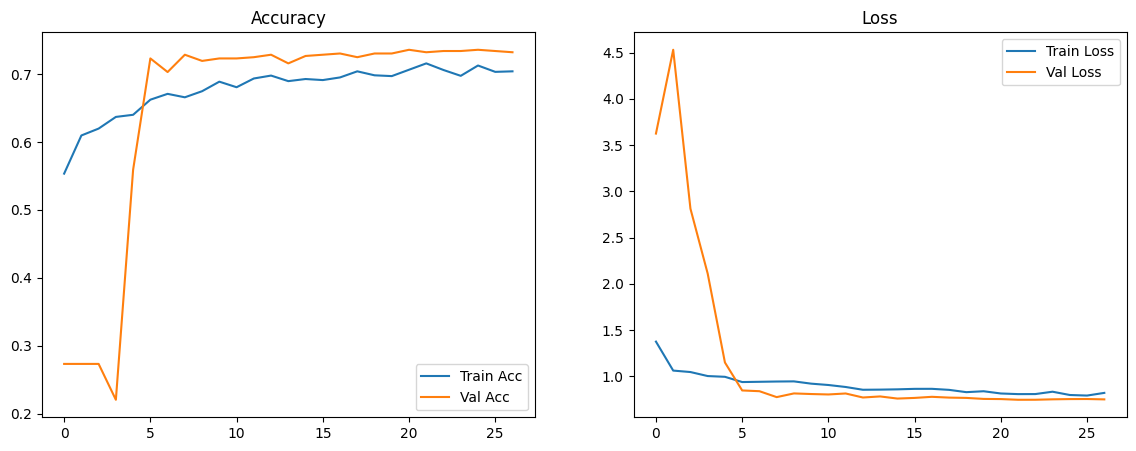

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step
Confusion matrix:
 [[  4  46   6   0   0]
 [  2 133  15   0   0]
 [  0   8 263   0   0]
 [  2  37   5   1   0]
 [  0  26   3   0   0]]
Classification report:
                 precision    recall  f1-score   support

          Mild       0.50      0.07      0.12        56
      Moderate       0.53      0.89      0.67       150
         No_DR       0.90      0.97      0.93       271
Proliferate_DR       1.00      0.02      0.04        45
        Severe       0.00      0.00      0.00        29

      accuracy                           0.73       551
     macro avg       0.59      0.39      0.35       551
  weighted avg       0.72      0.73      0.66       551



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


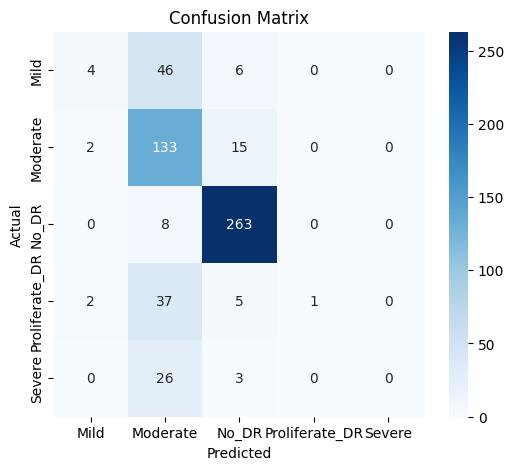

Reports saved to: /content/drive/MyDrive/chest_xray_report_dr/


In [ ]:
# 🔟 Train model
EPOCHS = 50
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)

# 11️⃣ Plot training curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

# 12️⃣ Evaluate on test set
test_generator.reset()
pred_prob = model.predict(test_generator)
pred = np.argmax(pred_prob, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, pred)
print("Confusion matrix:\n", cm)

cr = classification_report(y_true, pred, target_names=list(test_generator.class_indices.keys()))
print("Classification report:\n", cr)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 13️⃣ Save classification report and confusion matrix
report_dir = "/content/drive/MyDrive/chest_xray_report_dr/"
os.makedirs(report_dir, exist_ok=True)

with open(os.path.join(report_dir, "medium_cnn_dr_classification_report.txt"), "w") as f:
    f.write(cr)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.savefig(os.path.join(report_dir, "medium_cnn_dr_confusion_matrix.png"))
plt.close()

print("Reports saved to:", report_dir)